In [1]:
%matplotlib notebook

from modsim import *

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
degree = UNITS.degree
radian = UNITS.radian
newton = UNITS.newton

In [24]:
condition = Condition(x = 0 * m, 
                      y = 1 * m,
                      g = 9.8 * m/s**2,
                      mass = 79.4 * kg,
                      diameter = 0.4472 * m,
                      rho = 1.2 * kg/m**3,
                      C_d = 0.25,
                      angle = 45 * degree,
                      velocity = 60 * m / s,
                      duration = 8.5 * s)

In [25]:
def make_system(condition):
    """Make a system object.
    
    condition: Condition object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(condition)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, velocity)
    
    # make the initial state
    init = State(x=x, y=y, vx=vx, vy=vy)
    
    # compute area from diameter
    area = np.pi * (diameter/2)**2
    
    # compute timestamps
    ts = linspace(0, duration, 101)
    
    return System(init=init, g=g, mass=mass, 
                  area=area, rho=rho, C_d=C_d, ts=ts)

### PHASE 1

In [26]:
def slope_func(state, t, system):
    """Computes derivatives of the state variables.
    
    state: State (x, y, x velocity, y velocity)
    t: time
    system: System object with g, rho, C_d, area, mass
    
    returns: sequence (vx, vy, ax, ay)
    """
    x, y, vx, vy = state
    unpack(system)
    
    a_grav = Vector(0, -g)

    v = Vector(vx, vy)
    
    f_drag = -rho * v.mag * v * C_d * area / 2
    a_drag = f_drag / mass
    
    a = a_grav + a_drag
    
    return vx, vy, a.x, a.y

In [49]:
system = make_system(condition)
run_odeint(system, slope_func)

In [50]:
xs = system.results.x
ys = system.results.y

In [29]:
ys.head

<bound method NDFrame.head of 0.000     1.000000
0.085     4.568143
0.170     8.060198
0.255    11.476338
0.340    14.816731
0.425    18.081542
0.510    21.270933
0.595    24.385062
0.680    27.424083
0.765    30.388148
0.850    33.277406
0.935    36.092001
1.020    38.832077
1.105    41.497772
1.190    44.089222
1.275    46.606560
1.360    49.049917
1.445    51.419420
1.530    53.715193
1.615    55.937358
1.700    58.086035
1.785    60.161339
1.870    62.163385
1.955    64.092284
2.040    65.948145
2.125    67.731074
2.210    69.441177
2.295    71.078554
2.380    72.643305
2.465    74.135529
           ...    
6.035    72.402944
6.120    70.852021
6.205    69.232025
6.290    67.543044
6.375    65.785168
6.460    63.958490
6.545    62.063102
6.630    60.099099
6.715    58.066579
6.800    55.965639
6.885    53.796379
6.970    51.558903
7.055    49.253313
7.140    46.879714
7.225    44.438216
7.310    41.928926
7.395    39.351956
7.480    36.707419
7.565    33.995430
7.650    31.216106
7

<IPython.core.display.Javascript object>


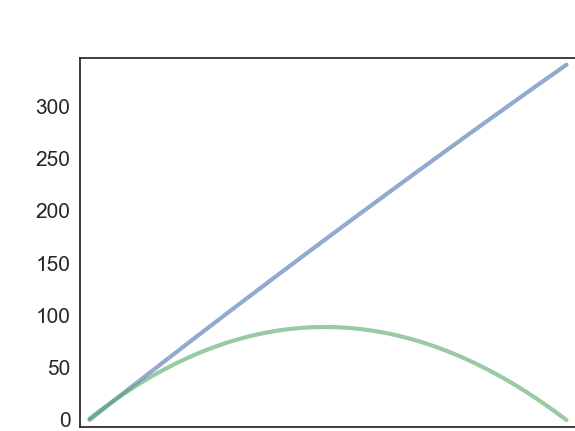

In [30]:
#plotting x and y as functions of time
newfig()
plot(xs, label='x')
plot(ys, label='y')

decorate(xlabel='Time (s)',
         ylabel='Position (m)')

<IPython.core.display.Javascript object>


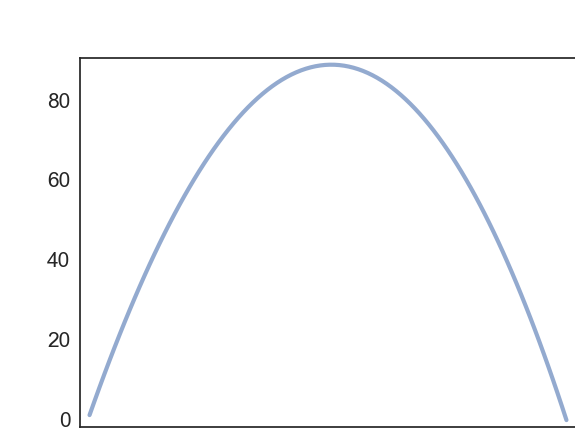

In [31]:
#trajectory plot
newfig()
plot(xs, ys, label='trajectory')

decorate(xlabel='x position (m)',
         ylabel='y position (m)')

<IPython.core.display.Javascript object>


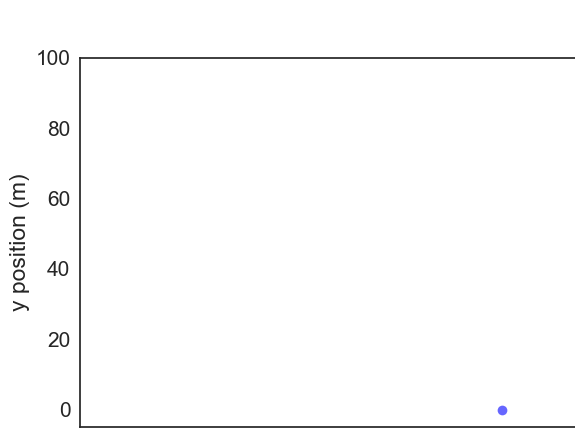

In [32]:
#animation
newfig()
decorate(xlabel='x position (m)',
         ylabel='y position (m)',
         xlim=[0, 400],
         ylim=[-5, 100],
         legend=False)

for x, y in zip(xs, ys):
    plot(x, y, 'bo', update=True)
    sleep(0.01)

In [3]:
def animate2d(xs, ys, speedup=1):
    """Animate the results of a projectile simulation.
    
    xs: x position as a function of time
    ys: y position as a function of time
    
    speedup: how much to divide `dt` by
    """
    # get the time intervals between elements
    ts = xs.index
    dts = np.diff(ts)
    dts = np.append(dts, 0)

    # decorate the plot
    newfig()
    decorate(xlabel='x position (m)',
             ylabel='y position (m)',
             xlim=[xs.min(), xs.max()],
             ylim=[ys.min(), ys.max()],
             legend=False)

    # loop through the values
    for x, y, dt in zip(xs, ys, dts):
        plot(x, y, 'bo', update=True)
        sleep(dt / speedup)

In [36]:
range_func(45, condition)

array(339.81549031960935)

### PHASE 2

In [190]:
condition2 = Condition(x = 0 * m, 
                      y = 1 * m,
                      g = 9.8 * m/s**2,
                      mass = 108.1 * kg, #10 kg fuel, 18.7 kg jetpack, 79.4 kg person
                      diameter = 0.4472 * m,
                      rho = 1.2 * kg/m**3,
                      C_d = 0.25,
                      angle = 45 * degree,
                      velocity = 60 * m / s,
                      duration = 25* s, #this was 8.5
                      ignite_t = 5 * s,
                      Force_j = 1500 * newton) #sets jetpack force, was 1334.5

In [124]:
def make_jetpack_system(condition):
    """Make a system object.
    
    condition: Condition object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(condition)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, velocity)
    
    # make the initial state
    init = State(x=x, y=y, vx=vx, vy=vy, M=0)
    
    # compute area from diameter
    area = np.pi * (diameter/2)**2
    
    # compute timestamps
    ts = linspace(0, duration, 101)
    
    Fj = Force_j
    
    return System(init=init, g=g, mass=mass, 
                  area=area, rho=rho, C_d=C_d, ts=ts, Fj=Fj, reached_zero=False)

In [183]:
def jetpack_slope_func(state, t, system):
    """Computes derivatives of the state variables.
    
    state: State (x, y, x velocity, y velocity)
    t: time
    system: System object with g, rho, C_d, area, mass
    
    returns: sequence (vx, vy, ax, ay)
    """
    x, y, vx, vy, M = state
    unpack(system)
    
    #Implement Rocket Equation to account for loss of momentum if time
    current_mass= mass - M
    dMdt = 0 * kg / s
    if t > ignite_t and t < ignite_t + 4 * s:
        dMdt = 2.5 * kg / s
        
    a_grav = Vector(0, -g)

    v = Vector(vx, vy)
 
    angle = v.angle
    
    #fixes error scenario
    error = Vector(10**-10, 0) * m/s
    if v.mag < error.mag:
        system.reached_zero = True
    if system.reached_zero:
        angle = 3 * pi / 2
    
    mag = Fj
    
    
    xf, yf = pol2cart(angle, -mag)

    f_jetpack = Vector(xf, yf)
    
    if t < ignite_t:
        f_jetpack=0 * newton
    if t >= ignite_t + 4 * s:
        f_jetpack=0 * newton
        
    a_jetpack = f_jetpack / current_mass
    
    f_drag = -rho * v.mag * v * C_d * area / 2
    a_drag = f_drag / current_mass
    
    a = a_grav + a_drag + a_jetpack
    
    return vx, vy, a.x, a.y, dMdt

In [166]:
system = make_jetpack_system(condition2)
run_odeint(system, jetpack_slope_func)

xs = system.results.x
ys = system.results.y
xvs = system.results.vx
yvs = system.results.vy
ms = system.results.M

<IPython.core.display.Javascript object>


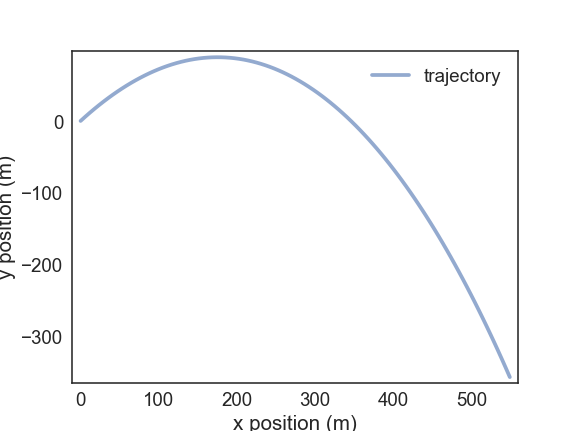

In [167]:
#trajectory plot
newfig()
plot(xs, ys, label='trajectory')

decorate(xlabel='x position (m)',
         ylabel='y position (m)')

<IPython.core.display.Javascript object>


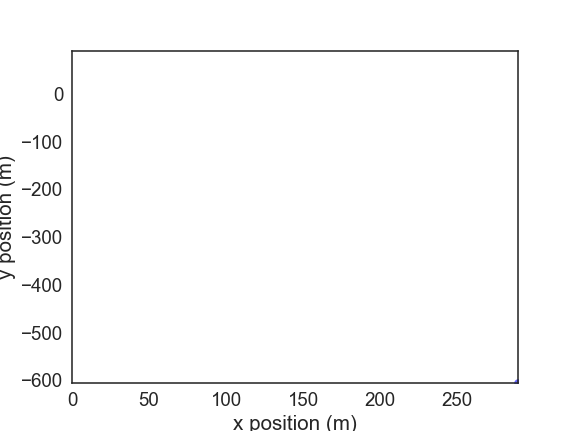

In [21]:
animate2d(xs, ys, speedup=1)

<IPython.core.display.Javascript object>


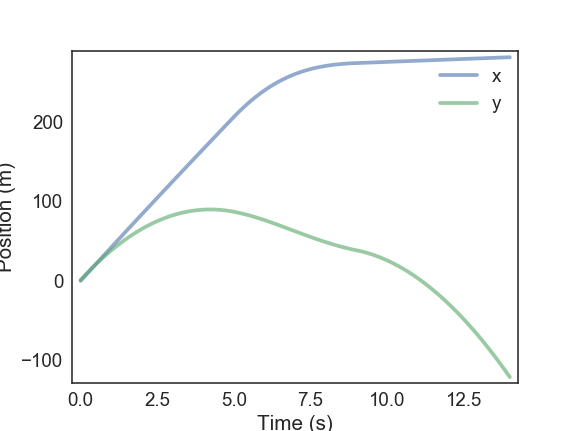

In [147]:
#plotting x and y as functions of time
newfig()
plot(xs, label='x')
plot(ys, label='y')

decorate(xlabel='Time (s)',
         ylabel='Position (m)')

<IPython.core.display.Javascript object>


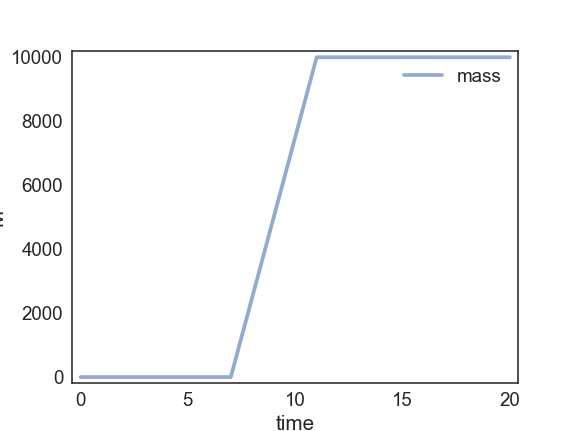

In [164]:
#Spent fuel mass plot
newfig()
plot(ms, label='mass')

decorate(xlabel='time',
         ylabel='M')

<IPython.core.display.Javascript object>


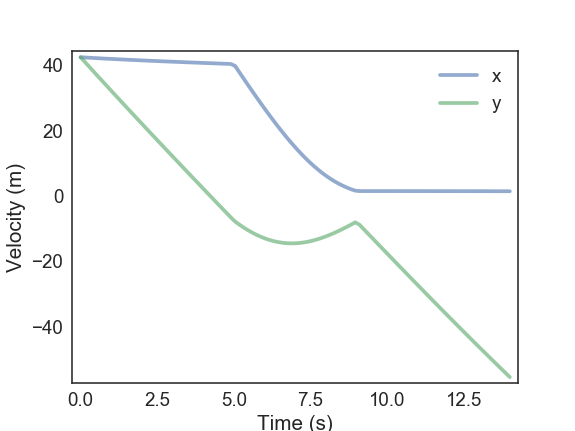

In [148]:
newfig()
plot(xvs, label='x')
plot(yvs, label='y')

decorate(xlabel='Time (s)',
         ylabel='Velocity (m)')

### Optimization

In [24]:
def interpolate_both(system):
    """Computes the range of the ball when it lands.
    
    results: TimeFrame with x and y
    
    returns: distance in meters
    """
    xs = system.results.x
    ys = system.results.y
    yvs = system.results.vy
    xvs = system.results.vx
    vs = sqrt(xvs**2 + yvs**2)
    
    t_end = ys.index[-1]
    
    if ys[t_end] > 0:
        msg = """The final value of y is still positive;
                 looks like the simulation didn't run
                 long enough."""
        raise ValueError(msg)
        
    t_peak = ys.argmax()
    descent = ys.loc[t_peak:]
    T = interp_inverse(descent, kind='cubic')
    
    t_land = T(0)
    X = interpolate(xs, kind='cubic')
    V = interpolate(vs, kind='cubic')
    return X(t_land), V(t_land)

In [123]:
list = interpolate_both(system)
list

(array(255.08317932168717), array(36.38098471248584))

In [168]:
#given an ingition time, returns the distance of the launch and the speed at impact
def end_state_func(ignite_t, condition):  
    
    condition.set(ignite_t = ignite_t * s)
    system = make_jetpack_system(condition)
    run_odeint(system, jetpack_slope_func)
    end_state = interpolate_both(system)
    print(ignite_t)
    print(system.Fj)
    return end_state

In [125]:
end_state_func(5, condition2)

5


(array(255.08317932168717), array(36.38098471248584))

In [26]:
#takes a list of possible ignite times, returns the distance and speed at each condition
#hahaha "ultimate"
def ultimate_sweep(t_array, condition):
    distances = SweepSeries()
    speeds = SweepSeries()
    for t in t_array:
        distances[t], speeds[t] = end_state_func(t, condition)
        
    #will get weird if you change the system name. This is fine with end_state_func,
    #because it just makes a system called system, so we should be fine, but be careful.
    system.distances = distances
    system.speeds = speeds

In [149]:
t_array = linspace(3, 11, 9)
ultimate_sweep(t_array, condition2)


3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0


<IPython.core.display.Javascript object>


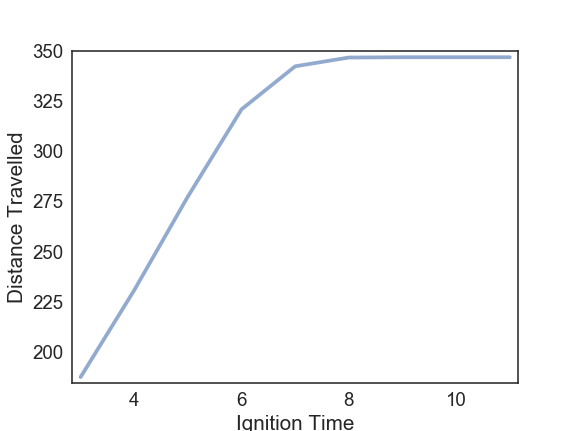

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [150]:
newfig()
plot(system.distances)
decorate(xlabel = 'Ignition Time',
         ylabel = 'Distance Travelled')

<IPython.core.display.Javascript object>


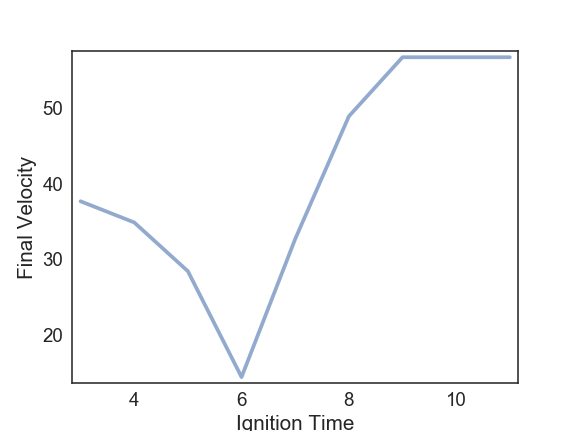

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [151]:
newfig()
plot(system.speeds)
decorate(xlabel = 'Ignition Time',
         ylabel = 'Final Velocity')

In [131]:
system.speeds.min()

array(14.287093909946845)

In [132]:
#Takes same t_array as ultimate_sweep, as well as the system and whatever safe is. Gives the distance, speed, and time.
#Only gives first instance of best time, if this curves there will be trouble.
def fly_farsafe (t_array, system, safe_speed=5):
    allowed_distances = SweepSeries()
    allowed_distances = system.distances
    for t in t_array:
        if system.speeds[t] >= safe_speed:
            allowed_distances[t] = 0
    
    best_distance = allowed_distances.max()
    best_time = system.speeds.argmin()
    best_speed = system.speeds.min()
    #if best_speed > safe_speed:
     #   return 0, best_speed, 0
    
    return best_distance, best_speed, best_time

In [133]:
t_array = linspace(3, 11, 9)
list = fly_farsafe(t_array, system, 15)
list

(array(320.89037487585784), array(14.287093909946845), 6)

In [153]:
def safe_landing(t_array, condition, safe_speed=15):
    
    ultimate_sweep(t_array, condition)
    best_distance, best_speed, best_time = fly_farsafe(t_array, system, safe_speed)
    return best_distance, best_speed, best_time

In [184]:
#t_array = linspace(3, 11, 9)
t_array = linspace(6, 6, 1)
list = safe_landing(t_array, condition2, safe_speed=15)
list

6.0
1500.0 newton
14.453677719740394


(array(320.89093233513375), array(14.453677719740394), 6)

### PHASE 4

In [179]:
def jetpack_sweep(f_array, t_array, condition, safe_speed=5):
    best_distances = SweepSeries()
    best_speeds = SweepSeries()
    best_times = SweepSeries()
    for f in f_array:
        condition.set(Force_j=f * newton)
        
        best_distances[f], best_speeds[f], best_times[f] = safe_landing(t_array, condition, safe_speed)
        
    system.best_distances = best_distances
    system.best_speeds = best_speeds
    system.best_times = best_times

In [192]:
f_array = linspace(1000, 3000, 5)
#f_array = linspace(3000, 3000, 1)
t_array = linspace(3, 11, 9)
#t_array = linspace(7, 11, 5)
jetpack_sweep(f_array, t_array, condition2, safe_speed=15)

3.0
1000.0 newton
4.0
1000.0 newton
5.0
1000.0 newton
6.0
1000.0 newton
7.0
1000.0 newton
8.0
1000.0 newton
9.0
1000.0 newton
10.0
1000.0 newton
11.0
1000.0 newton
30.636700051157597
3.0
1500.0 newton
4.0
1500.0 newton
5.0
1500.0 newton
6.0
1500.0 newton
7.0
1500.0 newton
8.0
1500.0 newton
9.0
1500.0 newton
10.0
1500.0 newton
11.0
1500.0 newton
14.173071026001349
3.0
2000.0 newton
4.0
2000.0 newton
5.0
2000.0 newton
6.0
2000.0 newton
7.0
2000.0 newton
8.0
2000.0 newton
9.0
2000.0 newton
10.0
2000.0 newton
11.0
2000.0 newton
20.400403334881
3.0
2500.0 newton
4.0
2500.0 newton
5.0
2500.0 newton
6.0
2500.0 newton
7.0
2500.0 newton
8.0
2500.0 newton
9.0
2500.0 newton
10.0
2500.0 newton
11.0
2500.0 newton
32.32960010469719
3.0
3000.0 newton
4.0
3000.0 newton
5.0
3000.0 newton
6.0
3000.0 newton
7.0
3000.0 newton
8.0
3000.0 newton
9.0
3000.0 newton
10.0
3000.0 newton
11.0
3000.0 newton
43.41222891385241


In [186]:
t_array = linspace(6, 6, 1)

condition2.set(Force_j=1500 * newton)
list = safe_landing(t_array, condition2, safe_speed=15)
list

6.0
1500 newton
14.453677719740394


(array(320.89093233513375), array(14.453677719740394), 6)

<IPython.core.display.Javascript object>


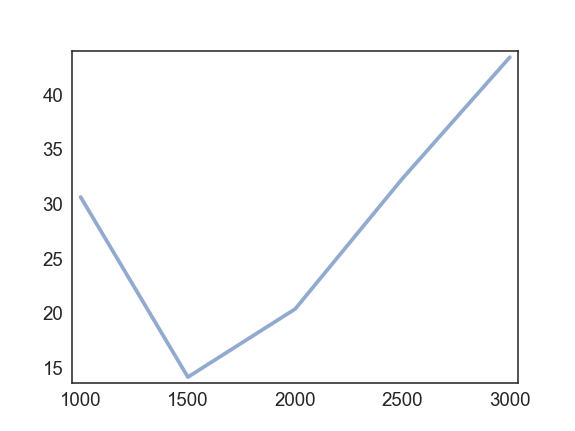

In [193]:
newfig()
plot(system.best_speeds)

In [140]:
system.best_speeds

,value
1000,56.56172136405703
1500,56.54865442872349
2000,56.535589262851936
2500,56.522526944753224
3000,56.50946600438699


In [178]:
condition2

,value
x,0 meter
y,1 meter
g,9.8 meter / second ** 2
mass,108.1 kilogram
diameter,0.4472 meter
rho,1.2 kilogram / meter ** 3
C_d,0.25
angle,45 degree
velocity,60.0 meter / second
duration,14 second
